In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')

# Complexidade

Não interessa somente que um algoritmo esteja correto, ie, que dê os resultados certos em relação aos inputs dados. É preciso que ele o faça dentro dos recursos disponíveis. Normalmente, os recursos que consideramos é o _tempo_ que o algoritmo demora a terminar, e a _memória_ que necessita ocupar durante os cálculos. Na maioria das situações, como o tempo é um recurso mais valioso que a memória, é costume focar-se mais na questão temporal. Este é um dos tópicos da _teoria da complexidade algorítmica_.

Uma das formas de analisar os algoritmos é avaliar o seu comportamento à medida que a dimensão do input aumenta. Esta é designada por _complexidade assiptótica_. Para exprimir a complexidade assiptótica é costume usar-se a notação $\mathcal{O}$ (diz-se 'notação ó grande').

A notação $\mathcal{O}$ descreve o comportamento de uma função quando o seu argumento cresce sem limite, ou seja, é uma forma de descrever e comparar funções de acordo com as suas taxas de crescimento.

A sua definição formal:

$$f \in \mathcal{O}(g) \iff \exists_{k \gt 0} \exists_{C \gt 0} \forall_{n>0} : 
n \gt k \implies \mid f(n) \mid \leq C \mid g(n) ~\mid$$

O que esta relação quer dizer é que se for verdade que $f \in \mathcal{O}(g)$ então significa que a partir de um dado valor $k$, e uma constante $C$, o valor absoluto $C\times g(n)$ é superior ao valor absoluto de $f(n)$, e portanto diz-se que $g$ domina $f$. Por outras palavras, $C \times g$ é um majorante de $f$. Chama-se a $\mathcal{O}(g)$ uma **classe de complexidade**.

Graficamente:

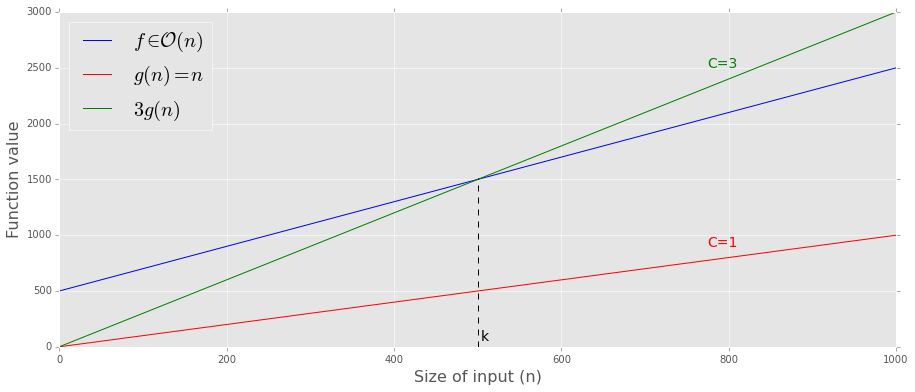

In [3]:
def f(n):
    return 500+2*n

def g(n):
    return n

n = np.arange(0, 1001)

plt.figure(figsize=(15,6)) 
plt.plot(n, f(n), c='blue')
plt.plot(n, g(n), c='red')
plt.plot(n, 3*g(n), c='green')
plt.xlabel('Size of input (n)',    fontsize=16)
plt.ylabel('Function value', fontsize=16)
plt.legend(['$f \in \mathcal{O}(n)$', '$g(n)=n$', '$3g(n)$'], loc='best', fontsize=20)

plt.plot([500, 500], [0, 1510], 'k--', lw=1)
plt.text(505, 50, 'k', fontsize = 14)
plt.text(775, 2500, 'C=3', fontsize = 14, color='g')
plt.text(775, 900,  'C=1', fontsize = 14, color='r')

Uma dada classe de complexidade $\mathcal{O}(g)$ representa o conjunto das funções dominadas/majoradas por $g$. 

Existem várias classes de complexidade famosas:

+ $\mathcal{O}(\log(n))$ - a classe logarítmica

+ $\mathcal{O}(n)$ - a classe linear

+ $\mathcal{O}(n.\log(n))$ - a classe pseudo-linear

+ $\mathcal{O}(n^2)$ - a classe quadrática

+ ${\large\cup_{p\geq 1}} \mathcal{O}(n^p)$ - a classe polinomial

+ ${\large\cup_{p\geq 1}} \mathcal{O}(p^n) \cup \ldots$ - a classe exponencial

Façamos a comparação entre algumas funções de diferentes classes:

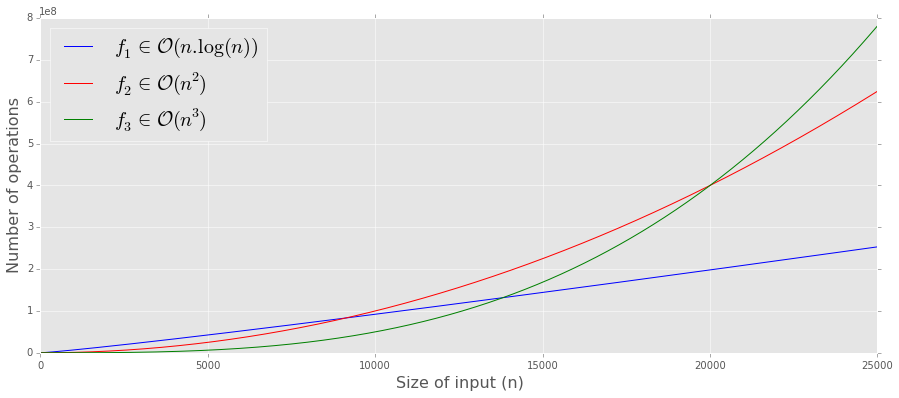

In [18]:
def f1(n, C):            # pseudo-linear growth
    return C*n*np.log(n)

def f2(n, C):            # quadratic growth
    return C*n*n

def f3(n, C):            # cubic growth
    return C*n*n*n

n = np.arange(1, 25001)

plt.figure(figsize=(15,6)) 
plt.plot(n, f1(n, 1000),    c='blue')
plt.plot(n, f2(n, 1),       c='red')
plt.plot(n, f3(n, 0.00005), c='green')
plt.xlabel('Size of input (n)',    fontsize=16)
plt.ylabel('Number of operations', fontsize=16)
plt.legend(['$f_1 \in\ \mathcal{O}(n.\log(n))$', '$f_2 \in\ \mathcal{O}(n^2\!)$', 
            '$f_3 \in\ \mathcal{O}(n^3\!)$'], loc='best', fontsize=20);

### Um plot iterativo para comparar crescimento polinomial e exponencial

Duas funções exemplo:

In [5]:
def poly_growth(n_min, n_max, exponent, breaks=20):
    """Polynomial growth"""
    ns = np.linspace(n_min, n_max, breaks)
    return ns ** exponent

def exp_growth(n_min, n_max, exponent, breaks=20):
    """Exponential growth"""
    ns = np.linspace(n_min, n_max, breaks)
    return exponent ** ns   

E o plot interactivo:

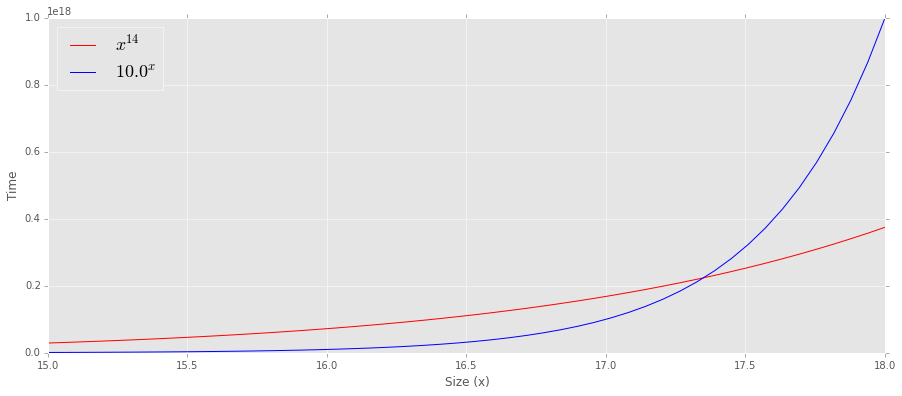

<function __main__.plot_curves>

In [6]:
from ipywidgets import *   # to install at shell: pip install ipywidgets

def plot_curves(n_min, n_max, exponent_pol, exponent_exp, breaks=20):
    
    polys = poly_growth(n_min, n_max, exponent_pol, breaks)
    exps  =  exp_growth(n_min, n_max, exponent_exp, breaks)

    ns = np.linspace(n_min, n_max, breaks)
    
    fig = plt.figure(figsize=(15, 6))
    plt.plot(ns, polys, 'r', label="$x^{%d}$"  % exponent_pol)  
    plt.plot(ns, exps,  'b', label="$%1.1f^x$" % exponent_exp)
    plt.xlabel('Size (x)')
    plt.ylabel('Time')
    plt.legend(loc="upper left", fontsize=18)
    plt.show()

interact(plot_curves,
         n_min        = widgets.IntSlider  (min=1, max=50, step=1,   value=15, description="$x_{min}$"),
         n_max        = widgets.IntSlider  (min=2, max=50, step=1,   value=18, description="$x_{max}$"),
         exponent_pol = widgets.IntSlider  (min=1, max=25, step=1,   value=14, description="$x^n$"),
         exponent_exp = widgets.FloatSlider(min=1, max=15, step=0.1, value=10, description="$n^x$"),
         breaks       = widgets.fixed(50))

### Uso da notação $\mathcal{O}$ para classificar algoritmos

A forma de aplicar as classes de complexidade temporal a um dado algoritmo é avaliar o comportamento do aumento dos tempos decorridos à medida que aumentamos a dimensão do seu input.

Esta avaliação pode ser **analítica**, estudando a estrutura do algoritmo para determinar a que classe de complexidade pertence; ou pode ser **empírica**, em que executamos o algoritmo repetidamente com inputs de dimensões diversas e comparamos os vários tempos de execução.

Vamos ver um exemplo de avaliação empírica. Para isso criamos duas funções que nos serão uteis a seguir:

In [7]:
import time
%precision 10

def getTimes(func, inputs, *args):
    """
    Computes the time it takes *func* to execute each of the given *inputs*
    """
    times = [0]*len(inputs)
    i = 0
    for inpt in inputs:
        start_time = time.clock()
        func(inpt, *args)
        times[i] = time.clock() - start_time
        i += 1
    return times

def plotTimes(ns, times):
    """
    Plots a bar with *ns* at x-axis, and *times* at y-axis
    """
    plt.figure(figsize=(15,6)) 
    plt.bar(ns, times)
    plt.xlabel('Size')
    plt.ylabel('Time')
    plt.show()

Agora vamos usar as duas versões recursivas que calculam a sequência de Fibonacci:

In [8]:
def fib(n):
    """pre: int n >= 0
    Exponential version
    Returns Fibonacci of n"""
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

def fibMem(n):
    """pre: int n >= 0
    Linear version using memoization, ie, save all solutions to avoid doing things twice
    Returns Fibonacci of n"""
    
    UNKNOWN = -1
    sols = [1,1] + [UNKNOWN]*(n-1)  # solution array (initially we only know the base cases)
    
    def fibMemR(n):
        if sols[n] == UNKNOWN:                # if already known, no need to recompute it
            sols[n] = fibMemR(n-1) + fibMemR(n-2) # save the solution for future needs
        return sols[n]
    
    return fibMemR(n) 

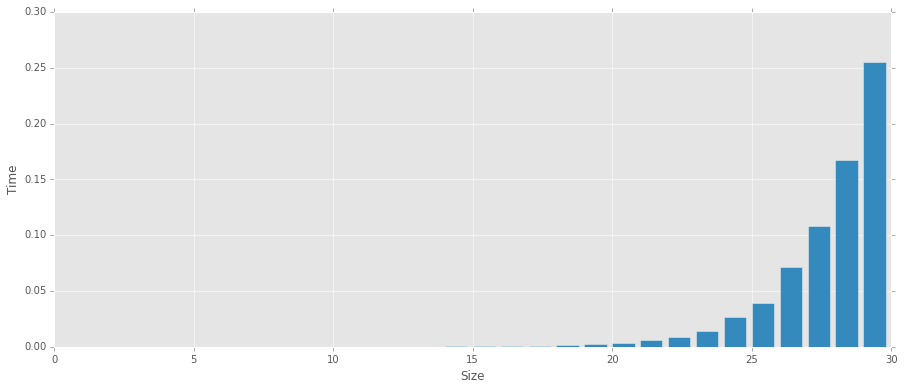

In [9]:
n = range(0, 30)
plotTimes(n, getTimes(fib, n))

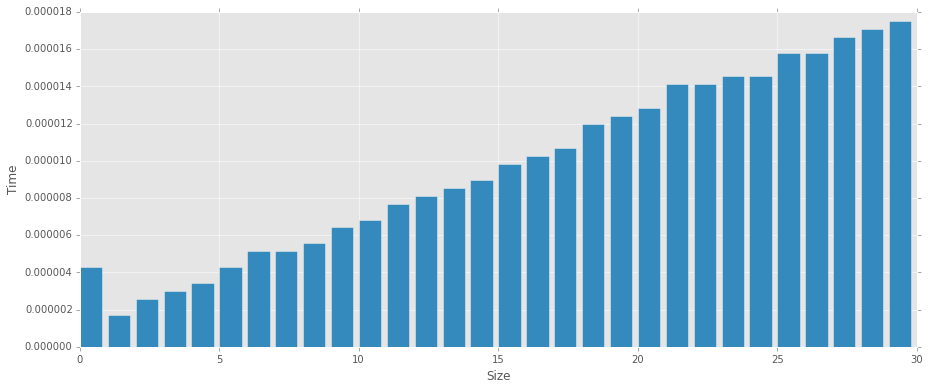

In [10]:
plotTimes(n, getTimes(fibMem, n))

Conseguimos intuir que a primeira versão tem o que aparenta ser um comportamento exponencial, e a segunda versão tem um comportamento linear.

Outro exemplo para o cálculo da raíz quadrada:

In [11]:
def squareRootExhaustive(x, epsilon):
    """Assumes x and epsilon are positive floats & epsilon < 1
    Returns a y such that y*y is within epsilon of x"""
    step = epsilon**2
    ans = 0.0
    while abs(ans**2 - x) >= epsilon and ans*ans <= x:
        ans += step
    if ans*ans > x:
        raise ValueError
    return ans

def squareRootBi(x, epsilon):
    """Assumes x and epsilon are positive floats & epsilon < 1
    Returns a y such that y*y is within epsilon of x"""
    low = 0.0
    high = max(1.0, x)
    ans = (high + low)/2.0
    while abs(ans**2 - x) >= epsilon:
        if ans**2 < x:
            low = ans
        else:
            high = ans
        ans = (high + low)/2.0
    return ans

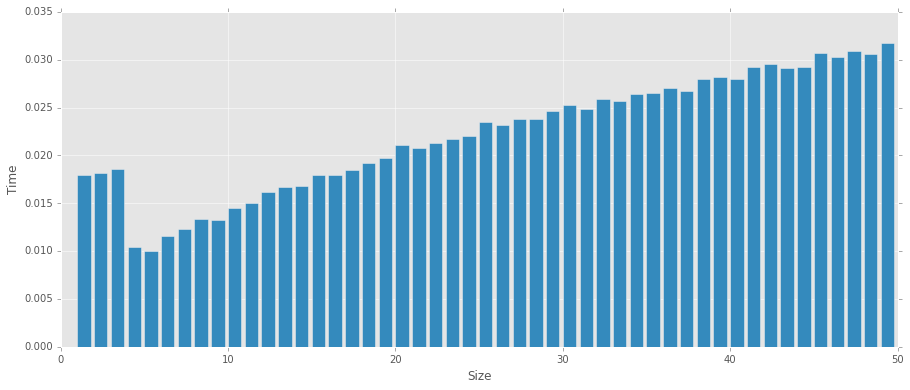

In [12]:
n = range(1, 50)
plotTimes(n, getTimes(squareRootExhaustive, n, 0.01))

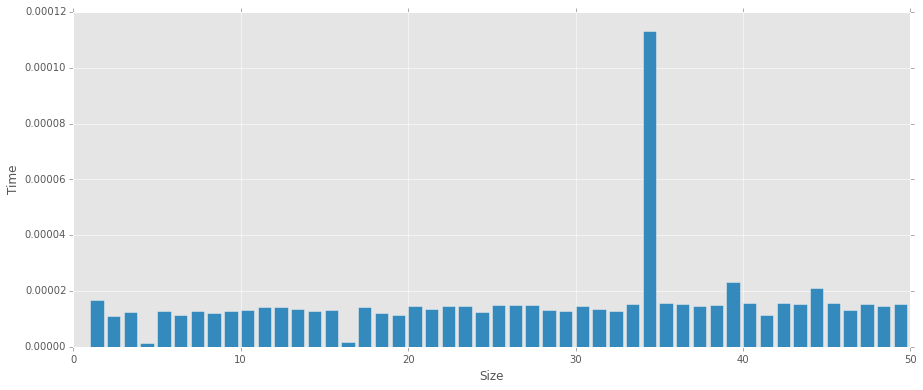

In [13]:
n = range(1, 50)
plotTimes(n, getTimes(squareRootBi, n, 0.0001))

Neste exemplo, a primeira versão aparenta ser linear, e a segunda parece constante ou com um crescimento muito lento. Na verdade, a função dos tempos de <code>squareRootBi</code> pertence à classe de complexidade logarítmica. Informamente dizemos que <code>squareRootBi</code> é $\mathcal{O}(\log n)$.

<hr>

## Other stuff

In [14]:
%%time 

# Jupyter notebooks can use %%time for measuring the running time of that cell:
print np.arange(0, 20)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Wall time: 1e+03 µs


## Space Complexity

In [15]:
import sys

print sys.getsizeof(1)
print sys.getsizeof(1234567890123456789012345678901234567890)
print sys.getsizeof(3.14)
print sys.getsizeof(3j)
print sys.getsizeof('a')
print sys.getsizeof('hello world')

24
44
24
32
34
44


In [16]:
print np.ones((100,100), dtype='byte').nbytes
print np.ones((100,100), dtype='i2').nbytes
print np.ones((100,100), dtype='int').nbytes # default is 64 bits or 8 bytes
print np.ones((100,100), dtype='float').nbytes # default is 64 bits or 8 bytes
print np.ones((100,100), dtype='complex').nbytes

10000
20000
40000
80000
160000


Refs:

+ [http://people.duke.edu/~ccc14/sta-663/AlgorithmicComplexity.html](http://people.duke.edu/~ccc14/sta-663/AlgorithmicComplexity.html)
    
+ [Time complexity for Python data structures](https://wiki.python.org/moin/TimeComplexity).    